In [2]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### Fase 2: Visualización
 
 ## Fase 2: Visualización
 Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

In [32]:
#leemos el csv 

df= pd.read_csv('data/datos_final.csv', index_col=0)

In [33]:
df.head(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,alberta,edmonton,t9g 1w3,female,bachelor,92552.0,married,aurora,7919.20,standard,2016,8,0.0,0.0
1,100102,2017,1,10,4,14,2030,203.0,0,0,ontario,toronto,m1r 4k3,male,college,71800.6,single,nova,2887.74,standard,2013,3,0.0,0.0


1. Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

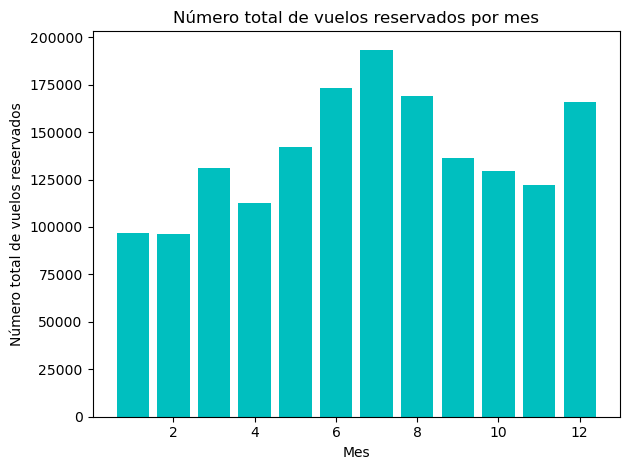

In [82]:

# Agrupar por mes y calcular la cantidad total de vuelos reservados
df_grouped = df.groupby('month')['flights_booked'].sum().reset_index()


plt.bar(df_grouped['month'], df_grouped['flights_booked'], color='c' )
plt.xlabel('Mes')
plt.ylabel('Número total de vuelos reservados')
plt.title('Número total de vuelos reservados por mes')
# Ajusta el diseño para que todo encaje
plt.tight_layout()



2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

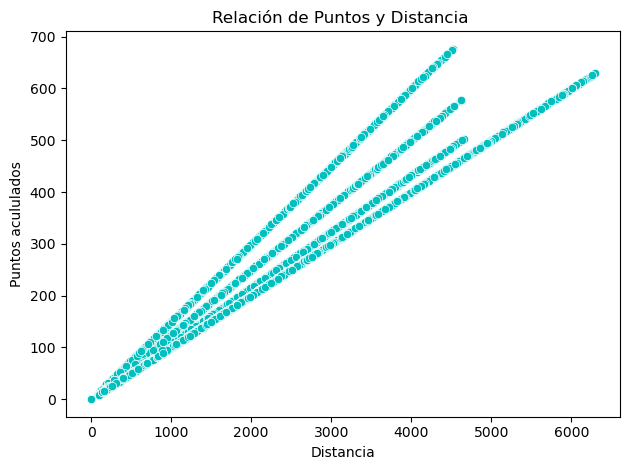

In [93]:
# creamos una gráfica básica usando 'sns.scatterplot()' 
# como ya lo hemos aprendido, vamos a cambiar el nombre de los ejes usando los métodos 'plt.xlabel()'  y 'plt.ylabel()' 
sns.scatterplot(x = "distance", 
                y = "points_accumulated", 
                data = df,
                color= "c")

# cambiamos los nombres de los ejes
plt.xlabel("Distancia")
plt.ylabel("Puntos acululados")
plt.title('Relación de Puntos y Distancia ')
# Ajusta el diseño para que todo encaje
plt.tight_layout()

 3. ¿Cuál es la distribución de los clientes por provincia o estado?

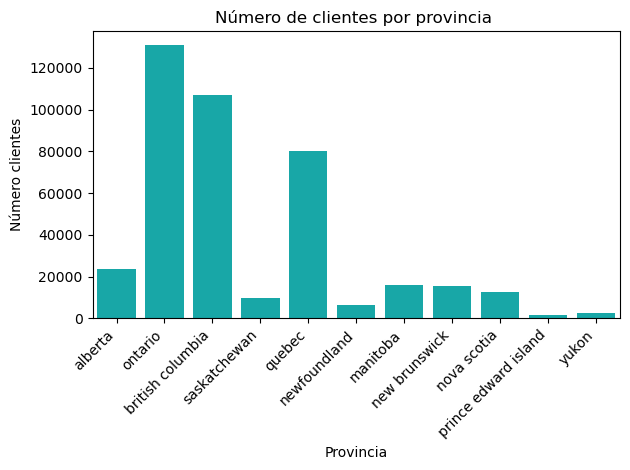

In [84]:

sns.countplot(x = "province", 
              data = df, 
              color = "c");

# cambiamos los nombres de los ejes
plt.xlabel("Provincia")
plt.ylabel("Número clientes");
plt.title('Número de clientes por provincia ')

# Rota las etiquetas del eje x si es necesario
plt.xticks(rotation=45, ha='right', fontsize=10)
# Ajusta el diseño para que todo encaje
plt.tight_layout()



 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

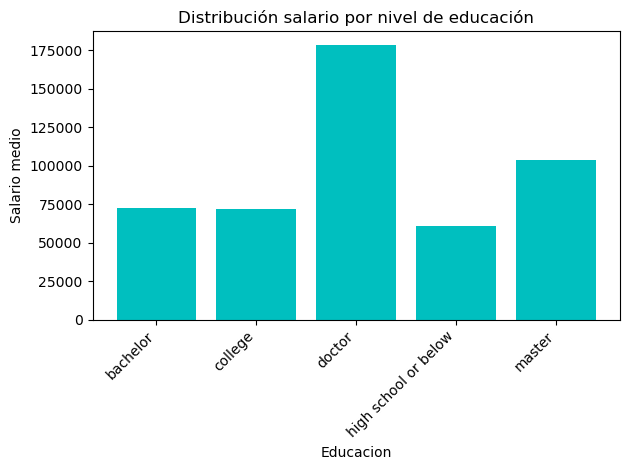

In [85]:
df_education_salary = df.groupby('education')['salary'].mean().reset_index()

plt.bar(df_education_salary['education'], df_education_salary['salary'], color='c' )
plt.xlabel('Educacion')
plt.ylabel('Salario medio')
plt.title('Distribución salario por nivel de educación')
# Rota las etiquetas del eje x si es necesario
plt.xticks(rotation=45, ha='right', fontsize=10)
# Ajusta el diseño para que todo encaje
plt.tight_layout()

 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

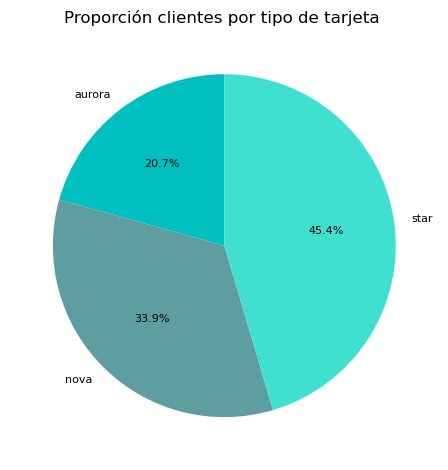

In [86]:
#agrupamos los clientes por tipo de tarjeta

df_tarjeta = df.groupby('loyalty_card')['loyalty_number'].count().reset_index()



# lo primero que vamos a hacer es definir una lista para definir los colores que queremos para cada una de las categorías. 
colores = ["c", "cadetblue", "turquoise"]


# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("loyalty_number", labels= "loyalty_card",
        data = df_tarjeta, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

plt.title('Proporción clientes por tipo de tarjeta ')
plt.tight_layout()

 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

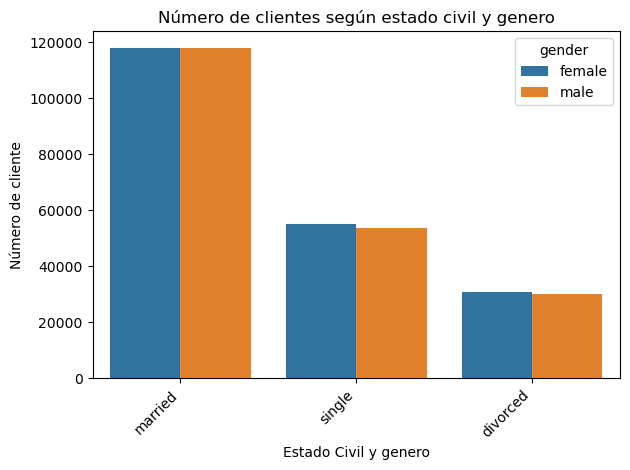

In [88]:
sns.countplot(data=df , x= 'marital_status', hue='gender')
plt.xlabel('Estado Civil y genero')
plt.ylabel('Número de cliente')
plt.title('Número de clientes según estado civil y genero')
# Rota las etiquetas del eje x si es necesario
plt.xticks(rotation=45, ha='right', fontsize=10)
# Ajusta el diseño para que todo encaje
plt.tight_layout()